In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import itertools
import statsmodels.api as sm
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [5]:
train_data=pd.read_csv('/home/jeet/Downloads/Untitled Folder/oct_march.csv',sep=',')

In [6]:
train_data.columns


Index(['chid', 'views', 'subscriber', 'videoscount', 'date'], dtype='object')

In [7]:
train_data.head()
train_data= train_data[(train_data.chid == 'UC64do0QynUFrMe85Zg')]

In [8]:
train_data = train_data.drop(['chid'], axis=1)

In [9]:
train_data.head()

,views,subscriber,videoscount,date
17276,1407827,1102,368,2016-10-01
17277,1408165,1102,368,2016-10-02
17278,1408479,1103,368,2016-10-03
17279,1408819,1103,368,2016-10-04
17280,1409120,1103,368,2016-10-05


In [10]:
train_data.describe()

,views,subscriber,videoscount
count,1.820000e+02,182.000000,182.000000
mean,1.573147e+06,1133.186813,373.620879
std,8.324359e+04,17.248532,2.866110
min,1.407827e+06,1102.000000,368.000000
25%,1.525222e+06,1120.250000,372.000000
50%,1.617977e+06,1136.000000,375.000000
75%,1.634045e+06,1143.750000,375.000000
max,1.664781e+06,1164.000000,384.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 17276 to 17457
Data columns (total 4 columns):
views          182 non-null int64
subscriber     182 non-null int64
videoscount    182 non-null int64
date           182 non-null object
dtypes: int64(3), object(1)
memory usage: 7.1+ KB


In [12]:
train_data.shape

(182, 4)

In [13]:
train_data['datetime']=pd.to_datetime(train_data.date)

In [14]:
train_data.columns

Index(['views', 'subscriber', 'videoscount', 'date', 'datetime'], dtype='object')

In [15]:
train_data.datetime.min()

Timestamp('2016-10-01 00:00:00')

In [16]:
train_data.datetime.max()

Timestamp('2017-03-31 00:00:00')

In [25]:
# train_data=train_data.set_index('datetime')

In [17]:
train_data=train_data.drop(['date'],axis=1)

In [18]:
train_data.head()

,views,subscriber,videoscount,datetime
17276,1407827,1102,368,2016-10-01
17277,1408165,1102,368,2016-10-02
17278,1408479,1103,368,2016-10-03
17279,1408819,1103,368,2016-10-04
17280,1409120,1103,368,2016-10-05


In [19]:
train_data=train_data.sort_values('datetime')

In [20]:
train_data.isnull().sum()

views          0
subscriber     0
videoscount    0
datetime       0
dtype: int64

In [21]:
train_data=train_data.groupby('datetime')['views','subscriber','videoscount'].sum().reset_index()

In [22]:
train_data.head()

,datetime,views,subscriber,videoscount
0,2016-10-01,1407827,1102,368
1,2016-10-02,1408165,1102,368
2,2016-10-03,1408479,1103,368
3,2016-10-04,1408819,1103,368
4,2016-10-05,1409120,1103,368


In [23]:
train_data=train_data.set_index('datetime')
train_data.index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10',
               ...
               '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-25',
               '2017-03-26', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name='datetime', length=182, freq=None)

In [24]:
train_data.columns

Index(['views', 'subscriber', 'videoscount'], dtype='object')

In [25]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [26]:
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

import itertools
import warnings

from statsmodels.graphics.api import qqplot

In [27]:
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)  # pandas
np.set_printoptions(precision=5, suppress=True)  # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

# For predicting Views

In [28]:
y=train_data['views']

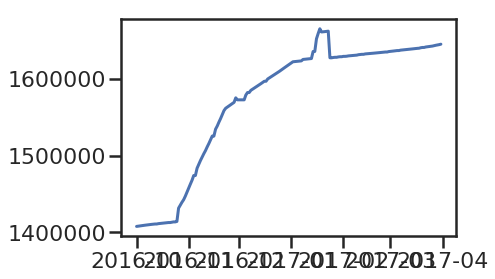

In [29]:
plt.plot(y)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdd612dfe10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd6126ef60>)

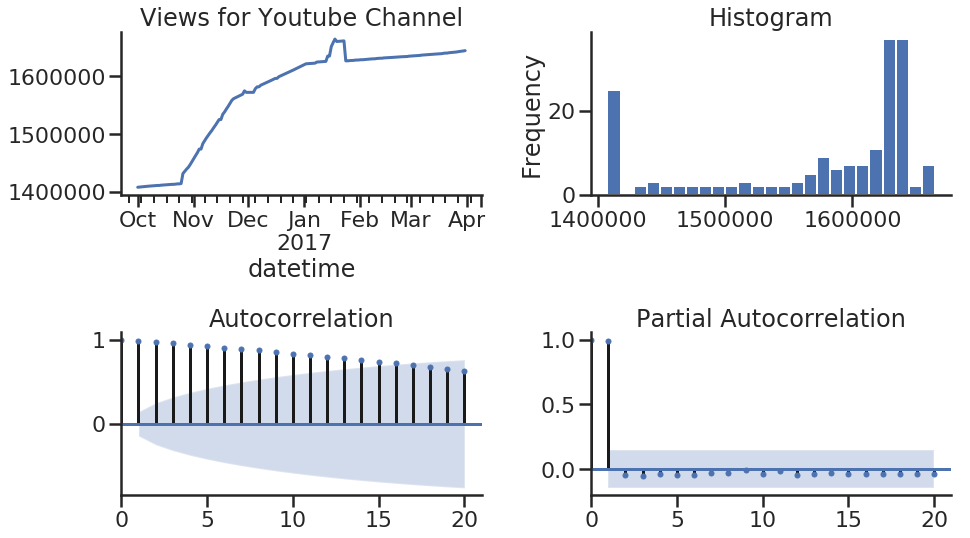

In [30]:
tsplot(y, title='Views for Youtube Channel', lags=20)

In [31]:
y.head(10)

datetime
2016-10-01    1407827
2016-10-02    1408165
2016-10-03    1408479
2016-10-04    1408819
2016-10-05    1409120
2016-10-06    1409395
2016-10-07    1409699
2016-10-08    1409958
2016-10-09    1410243
2016-10-10    1410501
Name: views, dtype: int64

In [32]:
rolmean=y.rolling(window=12).mean()

In [33]:
rolstd=y.rolling(window=12).std()

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

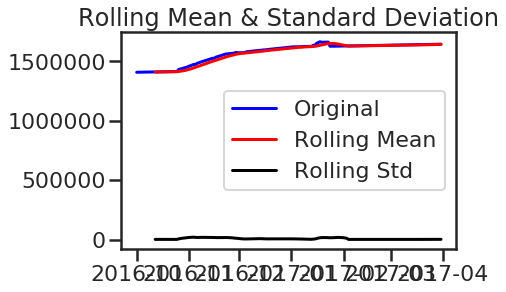

Results of Dickey-Fuller Test:
Test Statistic                 -2.40055
p-value                         0.14158
#Lags Used                      2.00000
Number of Observations Used   179.00000
Critical Value (1%)            -3.46742
Critical Value (5%)            -2.87783
Critical Value (10%)           -2.57545
dtype: float64


In [35]:
test_stationarity(y)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values with 95% confidence interval.

# Estimating & Eliminating Trend

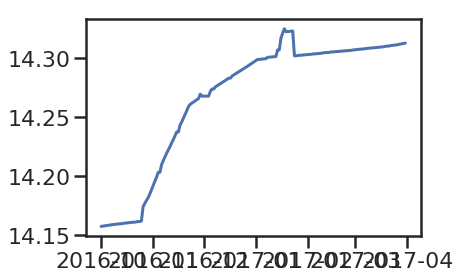

In [36]:
ts_log = np.log(y)
plt.plot(ts_log)

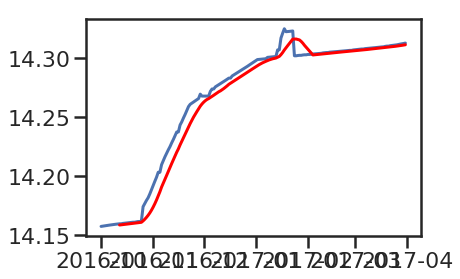

In [37]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [39]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

datetime
2016-10-01       nan
2016-10-02       nan
2016-10-03       nan
2016-10-04       nan
2016-10-05       nan
2016-10-06       nan
2016-10-07       nan
2016-10-08       nan
2016-10-09       nan
2016-10-10       nan
2016-10-11       nan
2016-10-12   0.00104
Name: views, dtype: float64

Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

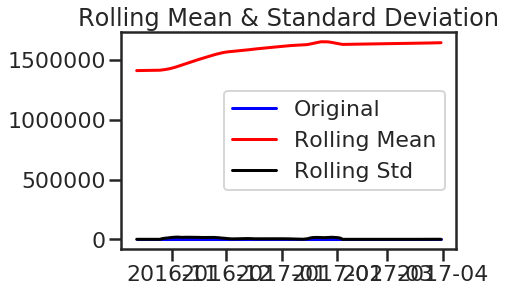

Results of Dickey-Fuller Test:
Test Statistic                 -1.63958
p-value                         0.46248
#Lags Used                     10.00000
Number of Observations Used   160.00000
Critical Value (1%)            -3.47190
Critical Value (5%)            -2.87978
Critical Value (10%)           -2.57649
dtype: float64


In [40]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series

# Eliminating Trend and Seasonality

Differencing

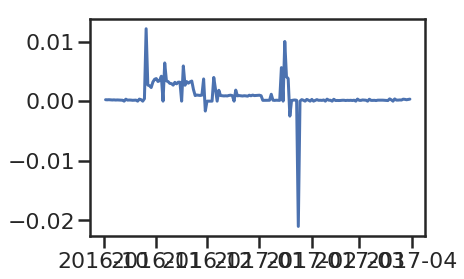

In [41]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

This appears to have reduced trend considerably. Lets verify using our plots:

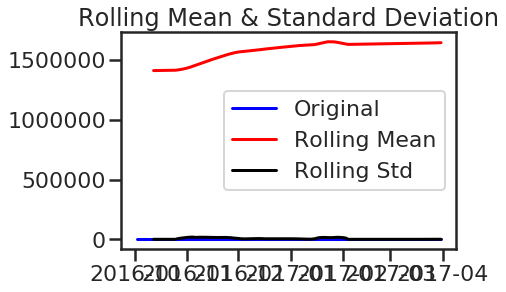

Results of Dickey-Fuller Test:
Test Statistic                 -2.69267
p-value                         0.07531
#Lags Used                     10.00000
Number of Observations Used   170.00000
Critical Value (1%)            -3.46941
Critical Value (5%)            -2.87870
Critical Value (10%)           -2.57592
dtype: float64


In [42]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Decomposing

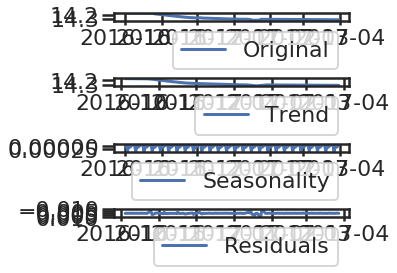

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#checking stationarity of residuals

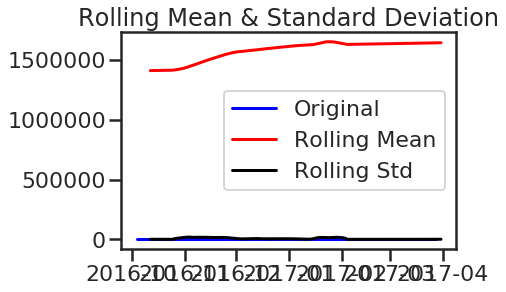

Results of Dickey-Fuller Test:
Test Statistic                 -6.99021
p-value                         0.00000
#Lags Used                      9.00000
Number of Observations Used   166.00000
Critical Value (1%)            -3.47037
Critical Value (5%)            -2.87911
Critical Value (10%)           -2.57614
dtype: float64


In [44]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary with 99% confidence interval.

# Forecasting a Time Series

In [45]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [46]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Here, p=1,q=0(approx.)

# ARIMA Model

In [47]:
from statsmodels.tsa.arima_model import ARIMA


AR Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0010')

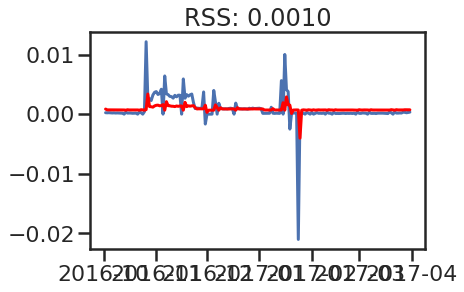

In [48]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

MA Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0010')

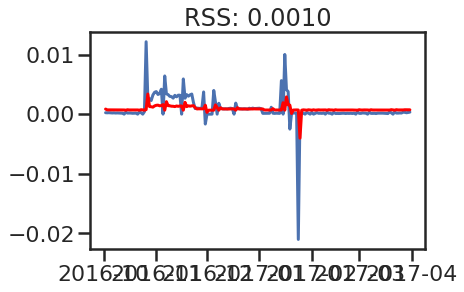

In [49]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Combined model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0010')

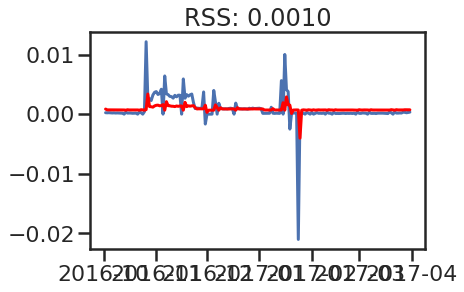

In [50]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Taking it back to original scale:-

In [51]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.tail())

datetime
2017-03-27   0.00071
2017-03-28   0.00074
2017-03-29   0.00073
2017-03-30   0.00072
2017-03-31   0.00073
dtype: float64


Notice that these start from ‘2016-10-02’ and not the first month.This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. 

In [52]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2016-10-02   0.00086
2016-10-03   0.00158
2016-10-04   0.00229
2016-10-05   0.00301
2016-10-06   0.00373
dtype: float64


In [53]:
#  lets create a series with all values as base number and add the differences to it.
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


datetime
2016-10-01   14.15756
2016-10-02   14.15842
2016-10-03   14.15913
2016-10-04   14.15985
2016-10-05   14.16057
dtype: float64

Text(0.5,1,'RMSE: 50265.6979')

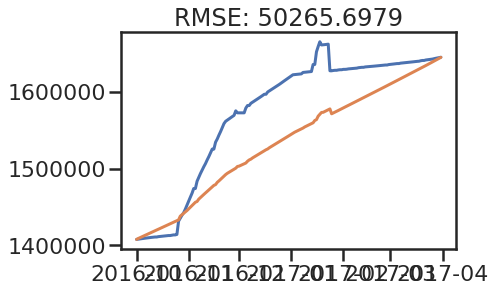

In [54]:
# taking exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y)**2)/len(y)))

In [57]:
results_ARIMA.forecast(steps=90)
#Series for 90 days prediction.

(array([14.31381, 14.31464, 14.31549, 14.31635, 14.31721, 14.31807,
        14.31892, 14.31978, 14.32064, 14.32149, 14.32235, 14.32321,
        14.32407, 14.32492, 14.32578, 14.32664, 14.3275 , 14.32835,
        14.32921, 14.33007, 14.33093, 14.33178, 14.33264, 14.3335 ,
        14.33436, 14.33521, 14.33607, 14.33693, 14.33778, 14.33864,
        14.3395 , 14.34036, 14.34121, 14.34207, 14.34293, 14.34379,
        14.34464, 14.3455 , 14.34636, 14.34722, 14.34807, 14.34893,
        14.34979, 14.35065, 14.3515 , 14.35236, 14.35322, 14.35408,
        14.35493, 14.35579, 14.35665, 14.3575 , 14.35836, 14.35922,
        14.36008, 14.36093, 14.36179, 14.36265, 14.36351, 14.36436,
        14.36522, 14.36608, 14.36694, 14.36779, 14.36865, 14.36951,
        14.37037, 14.37122, 14.37208, 14.37294, 14.37379, 14.37465,
        14.37551, 14.37637, 14.37722, 14.37808, 14.37894, 14.3798 ,
        14.38065, 14.38151, 14.38237, 14.38323, 14.38408, 14.38494,
        14.3858 , 14.38666, 14.38751, 14.38837, 

# For Predicting Subscriber

In [58]:
train_data.columns

Index(['views', 'subscriber', 'videoscount'], dtype='object')

In [59]:
y1=train_data['subscriber']

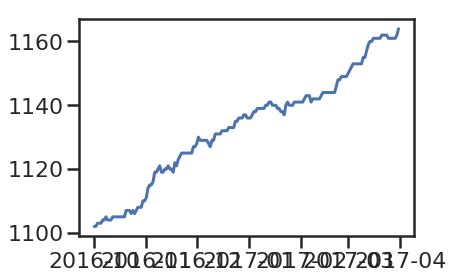

In [60]:
plt.plot(y1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdd601465f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd600ef3c8>)

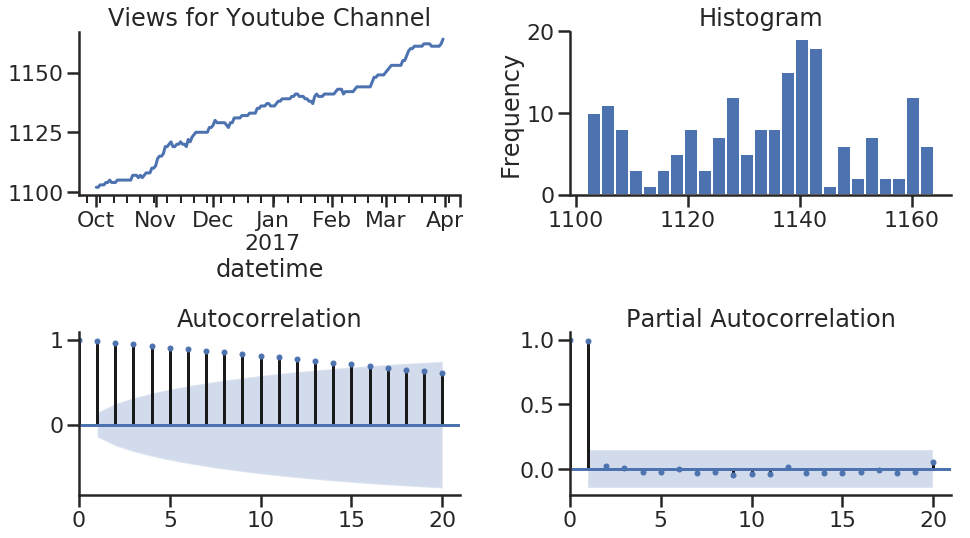

In [68]:
tsplot(y1, title='Views for Youtube Channel', lags=20)

In [61]:
rolmean1=y1.rolling(window=12).mean()

In [62]:
rolstd1=y1.rolling(window=12).std()

In [63]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity1(timeseries):
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean1, color='red', label='Rolling Mean')
    std = plt.plot(rolstd1, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

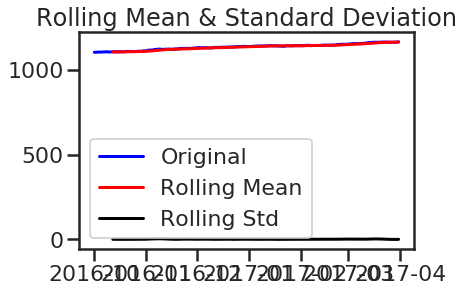

Results of Dickey-Fuller Test:
Test Statistic                 -0.39826
p-value                         0.91039
#Lags Used                      0.00000
Number of Observations Used   181.00000
Critical Value (1%)            -3.46700
Critical Value (5%)            -2.87764
Critical Value (10%)           -2.57536
dtype: float64


In [69]:
test_stationarity1(y1)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

# Estimating & Eliminating Trend

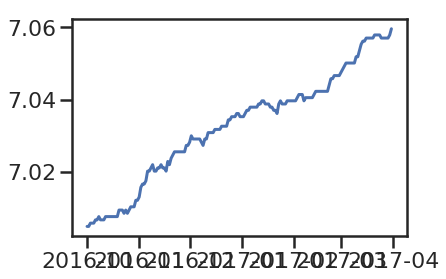

In [70]:
ts_log = np.log(y1)
plt.plot(ts_log)

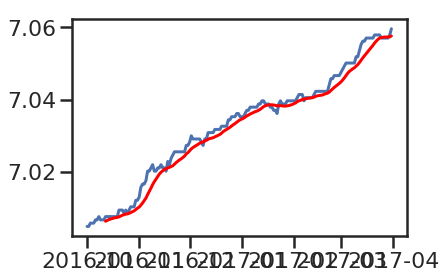

In [71]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [72]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

datetime
2016-10-01       nan
2016-10-02       nan
2016-10-03       nan
2016-10-04       nan
2016-10-05       nan
2016-10-06       nan
2016-10-07       nan
2016-10-08       nan
2016-10-09       nan
2016-10-10       nan
2016-10-11       nan
2016-10-12   0.00128
Name: subscriber, dtype: float64

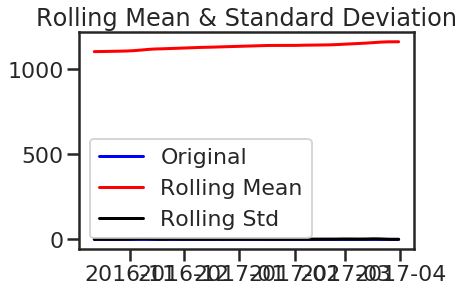

Results of Dickey-Fuller Test:
Test Statistic                 -3.58714
p-value                         0.00601
#Lags Used                      0.00000
Number of Observations Used   170.00000
Critical Value (1%)            -3.46941
Critical Value (5%)            -2.87870
Critical Value (10%)           -2.57592
dtype: float64


In [73]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity1(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series

# Eliminating Trend and Seasonality

Differencing

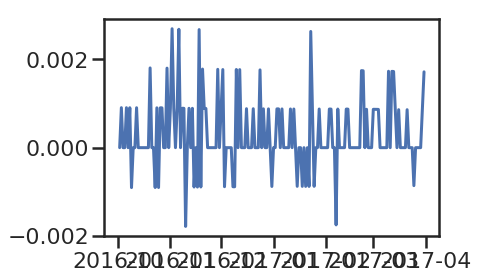

In [75]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

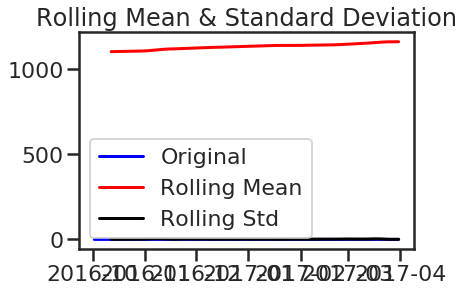

Results of Dickey-Fuller Test:
Test Statistic                -14.05512
p-value                         0.00000
#Lags Used                      0.00000
Number of Observations Used   180.00000
Critical Value (1%)            -3.46721
Critical Value (5%)            -2.87773
Critical Value (10%)           -2.57540
dtype: float64


In [76]:
ts_log_diff.dropna(inplace=True)
test_stationarity1(ts_log_diff)

Decomposing

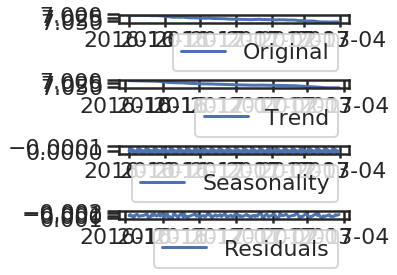

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#checking stationary of residuals

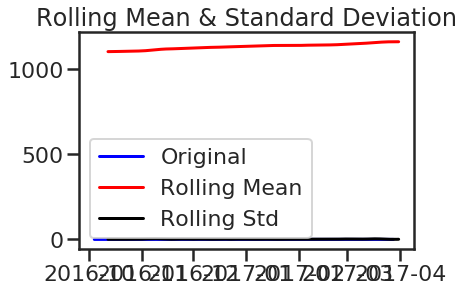

Results of Dickey-Fuller Test:
Test Statistic                 -7.61816
p-value                         0.00000
#Lags Used                      7.00000
Number of Observations Used   168.00000
Critical Value (1%)            -3.46989
Critical Value (5%)            -2.87890
Critical Value (10%)           -2.57603
dtype: float64


In [78]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity1(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary

# Forecasting a Time Series

In [79]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [80]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Here, p=1,q=0(approx.)

# ARIMA Model

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
AR model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0001')

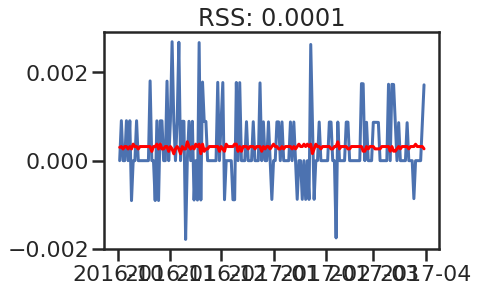

In [83]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [ ]:
MA Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0001')

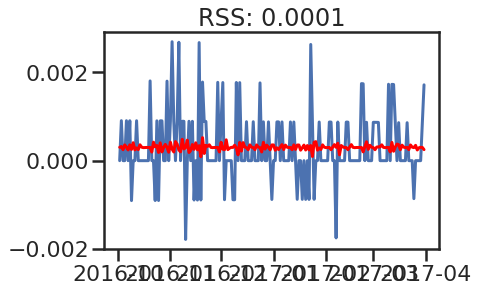

In [84]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Combined Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0001')

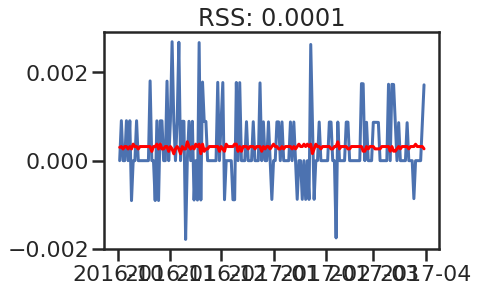

In [91]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Taking it back to original scale

In [86]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

datetime
2016-10-02   0.00086
2016-10-03   0.00072
2016-10-04   0.00072
2016-10-05   0.00072
2016-10-06   0.00071
dtype: float64


Notice that these start from ‘2016-10-02’ and not the first month.This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from.

In [87]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2016-10-02   0.00086
2016-10-03   0.00158
2016-10-04   0.00229
2016-10-05   0.00301
2016-10-06   0.00373
dtype: float64


In [88]:
#  lets create a series with all values as base number and add the differences to it.
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


datetime
2016-10-01   7.00488
2016-10-02   7.00574
2016-10-03   7.00646
2016-10-04   7.00717
2016-10-05   7.00789
dtype: float64

Text(0.5,1,'RMSE: 77.5286')

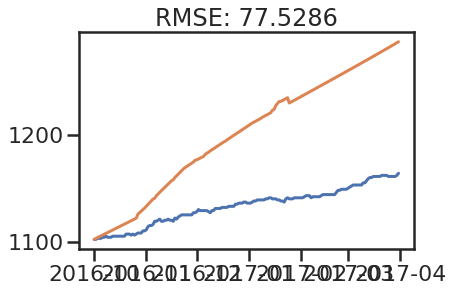

In [89]:
# taking exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y1)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y1)**2)/len(y1)))

In [90]:
results_ARIMA.predict()

2016-10-02   0.00086
2016-10-03   0.00072
2016-10-04   0.00072
2016-10-05   0.00072
2016-10-06   0.00071
2016-10-07   0.00071
2016-10-08   0.00071
2016-10-09   0.00071
2016-10-10   0.00071
2016-10-11   0.00071
2016-10-12   0.00070
2016-10-13   0.00070
2016-10-14   0.00067
2016-10-15   0.00074
2016-10-16   0.00070
2016-10-17   0.00071
2016-10-18   0.00071
2016-10-19   0.00070
2016-10-20   0.00070
2016-10-21   0.00070
2016-10-22   0.00067
2016-10-23   0.00074
2016-10-24   0.00072
2016-10-25   0.00067
2016-10-26   0.00076
2016-10-27   0.00338
2016-10-28   0.00127
2016-10-29   0.00124
2016-10-30   0.00118
2016-10-31   0.00138
2016-11-01   0.00149
2016-11-02   0.00151
2016-11-03   0.00140
2016-11-04   0.00144
2016-11-05   0.00160
2016-11-06   0.00067
2016-11-07   0.00210
2016-11-08   0.00143
2016-11-09   0.00140
2016-11-10   0.00133
2016-11-11   0.00132
2016-11-12   0.00127
2016-11-13   0.00137
2016-11-14   0.00131
2016-11-15   0.00138
2016-11-16   0.00138
2016-11-17   0.00067
2016-11-18   

# For Predicting Videoscount

In [74]:
y2=train_data['videoscount']

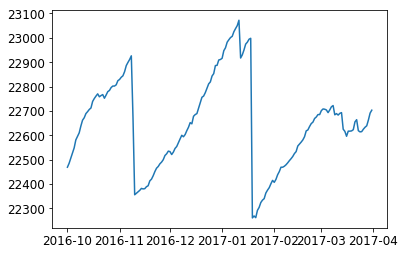

In [75]:
plt.plot(y2)

In [76]:
rolmean2=y2.rolling(window=12).mean()
rolstd2=y2.rolling(window=12).std()

In [77]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity2(timeseries):
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean2, color='red', label='Rolling Mean')
    std = plt.plot(rolstd2, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

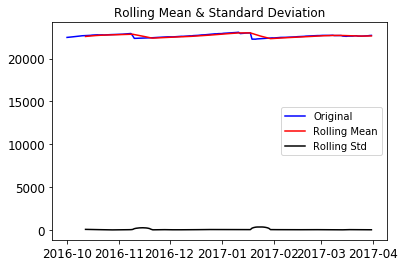

Results of Dickey-Fuller Test:
Test Statistic                  -2.749735
p-value                          0.065820
#Lags Used                       1.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (5%)             -2.877735
Critical Value (10%)            -2.575403
dtype: float64


In [78]:
test_stationarity2(y2)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is more than the critical values.

# Estimating & Eliminating Trend

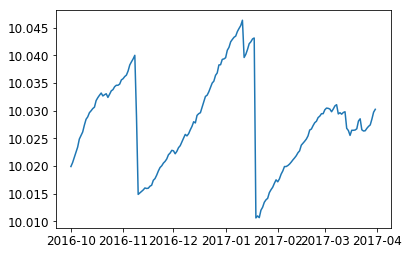

In [79]:
ts_log = np.log(y2)
plt.plot(ts_log)

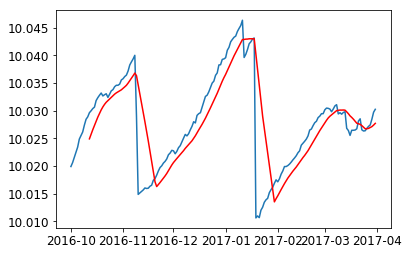

In [80]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [81]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

datetime
2016-10-01         NaN
2016-10-02         NaN
2016-10-03         NaN
2016-10-04         NaN
2016-10-05         NaN
2016-10-06         NaN
2016-10-07         NaN
2016-10-08         NaN
2016-10-09         NaN
2016-10-10         NaN
2016-10-11         NaN
2016-10-12    0.004732
Name: videoscount, dtype: float64

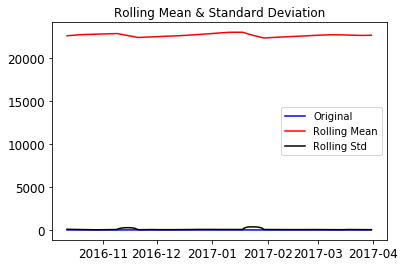

Results of Dickey-Fuller Test:
Test Statistic                  -3.765529
p-value                          0.003280
#Lags Used                       1.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


In [82]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity2(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series

# Eliminating Trend & Seasonality

Differencing

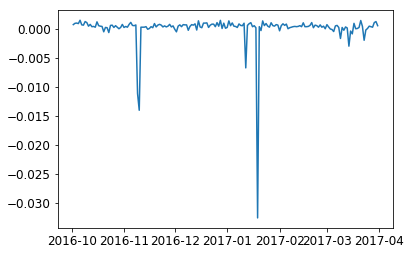

In [83]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

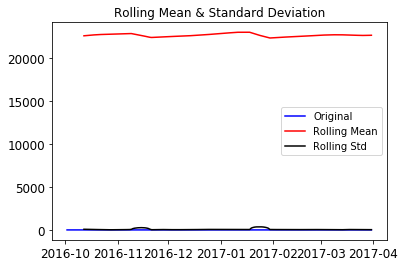

Results of Dickey-Fuller Test:
Test Statistic                -1.201566e+01
p-value                        3.106710e-22
#Lags Used                     0.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64


In [84]:
ts_log_diff.dropna(inplace=True)
test_stationarity2(ts_log_diff)

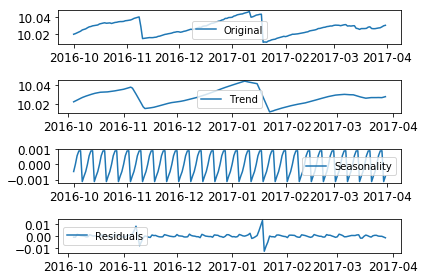

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Checking stationarity of residuals

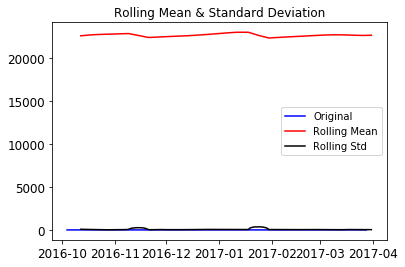

Results of Dickey-Fuller Test:
Test Statistic                -7.018135e+00
p-value                        6.650157e-10
#Lags Used                     7.000000e+00
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


In [86]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity2(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary

# Forecasting a Time Series

In [87]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [88]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

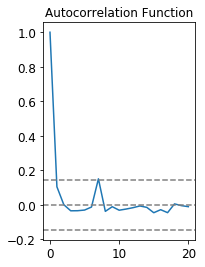

In [89]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

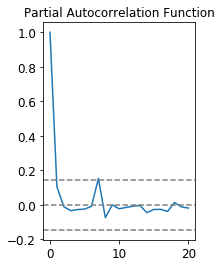

In [90]:
#Plot PACF: 
plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

Here, p=q=2(approx.)

# ARIMA Model

In [91]:
from statsmodels.tsa.arima_model import ARIMA

AR Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0015')

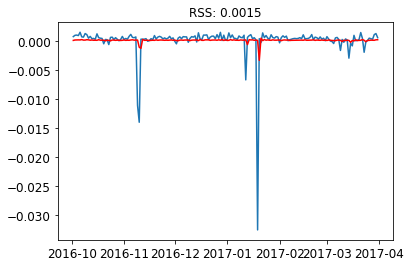

In [92]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

MA Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0015')

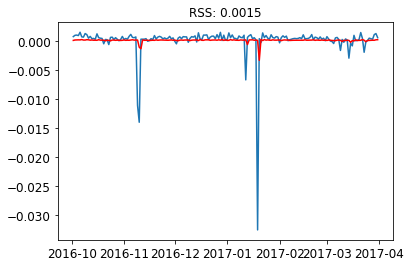

In [93]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Combined Model:-

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.0015')

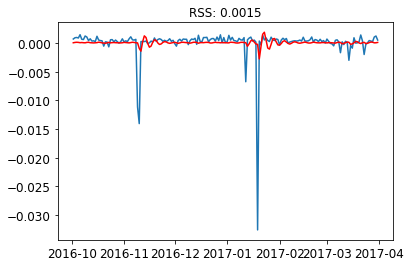

In [94]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Taking it back to original scale

In [95]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

datetime
2016-10-02    0.000057
2016-10-03    0.000115
2016-10-04    0.000144
2016-10-05    0.000122
2016-10-06    0.000071
dtype: float64


Notice that these start from ‘2016-10-02’ and not the first month.This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from.

In [96]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

datetime
2016-10-02    0.000057
2016-10-03    0.000172
2016-10-04    0.000315
2016-10-05    0.000437
2016-10-06    0.000508
dtype: float64


In [97]:
#  lets create a series with all values as base number and add the differences to it.
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/home/jeet/miniconda3/envs/pi3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


datetime
2016-10-01    10.019892
2016-10-02    10.019949
2016-10-03    10.020064
2016-10-04    10.020207
2016-10-05    10.020329
dtype: float64

In [ ]:
# taking exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y2)**2)/len(y2)))

Text(0.5,1,'RMSE: 202.3047')